# Massless Noninteracting Scalar Field by Baumgarte & Shapiro Page 178
##  Geoff Cope
##  Univeristy of Utah
##  December 22, 2021

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
t,r,theta,phi,dt,dr,dtheta,dphi = symbols('t r theta phi dt dr dtheta dphi')

In [4]:
variables = Matrix( [t,r,theta,phi] )
variables

⎡t⎤
⎢ ⎥
⎢r⎥
⎢ ⎥
⎢θ⎥
⎢ ⎥
⎣φ⎦

In [5]:
differentials = Matrix( [dt,dr,dtheta,dphi] )
differentials

⎡  dt  ⎤
⎢      ⎥
⎢  dr  ⎥
⎢      ⎥
⎢dtheta⎥
⎢      ⎥
⎣ dphi ⎦

In [6]:
Phi = Function('Phi')(r)
Phi

In [7]:
Lambda = Function('Lambda')(r)
Lambda

In [9]:
lineElement = expand(- exp(2*Phi)*dt**2 + exp(2*Lambda)*dr**2 + r**2 * ( dtheta**2 + sin(theta)**2 * dphi**2 ))
lineElement

In [10]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡  2⋅Φ(r)                         ⎤
⎢-ℯ           0     0       0     ⎥
⎢                                 ⎥
⎢           2⋅Λ(r)                ⎥
⎢   0      ℯ        0       0     ⎥
⎢                                 ⎥
⎢                    2            ⎥
⎢   0         0     r       0     ⎥
⎢                                 ⎥
⎢                        2    2   ⎥
⎣   0         0     0   r ⋅sin (θ)⎦

In [11]:
import sympy

In [12]:
m = sympy.Array(g)
m

⎡  2⋅Φ(r)                         ⎤
⎢-ℯ           0     0       0     ⎥
⎢                                 ⎥
⎢           2⋅Λ(r)                ⎥
⎢   0      ℯ        0       0     ⎥
⎢                                 ⎥
⎢                    2            ⎥
⎢   0         0     r       0     ⎥
⎢                                 ⎥
⎢                        2    2   ⎥
⎣   0         0     0   r ⋅sin (θ)⎦

In [13]:
from einsteinpy.symbolic import *

In [14]:
syms = sympy.symbols("t r theta phi")
t,r,theta,phi = syms

In [15]:
metric = MetricTensor(m,syms)

In [16]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡                            ⎡ -2⋅Λ(r) + 2⋅Φ(r) d                                                   ⎤  ⎡0  0  0      0     ⎤  ⎡0  0  
⎢⎡          d             ⎤  ⎢ℯ                ⋅──(Φ(r))     0           0                0         ⎥  ⎢                   ⎥  ⎢      
⎢⎢   0      ──(Φ(r))  0  0⎥  ⎢                  dr                                                  ⎥  ⎢      1            ⎥  ⎢      
⎢⎢          dr            ⎥  ⎢                                                                      ⎥  ⎢0  0  ─      0     ⎥  ⎢0  0  
⎢⎢                        ⎥  ⎢                            d                                         ⎥  ⎢      r            ⎥  ⎢      
⎢⎢d                       ⎥  ⎢            0               ──(Λ(r))       0                0         ⎥  ⎢                   ⎥  ⎢      
⎢⎢──(Φ(r))     0      0  0⎥  ⎢                            dr                                        ⎥  ⎢   1               ⎥  ⎢      
⎢⎢dr                      ⎥  ⎢                                

In [17]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡⎛  ⎛                                2     2      ⎞             ⎞                                                                    
⎢⎜  ⎜  d        d          ⎛d       ⎞     d       ⎟     d       ⎟  -2⋅Λ(r) + 2⋅Φ(r)                                                  
⎢⎜r⋅⎜- ──(Λ(r))⋅──(Φ(r)) + ⎜──(Φ(r))⎟  + ───(Φ(r))⎟ + 2⋅──(Φ(r))⎟⋅ℯ                                                                  
⎢⎜  ⎜  dr       dr         ⎝dr      ⎠      2      ⎟     dr      ⎟                                                                    
⎢⎝  ⎝                                    dr       ⎠             ⎠                                                                    
⎢──────────────────────────────────────────────────────────────────────────────────                             0                    
⎢                                        r                                                                                           
⎢                                                             

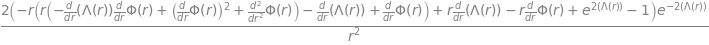

In [18]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [19]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡⎛  ⎛                                2     2      ⎞             ⎞                         ⎛  ⎛    ⎛                                2 
⎢⎜  ⎜  d        d          ⎛d       ⎞     d       ⎟     d       ⎟  -2⋅Λ(r) + 2⋅Φ(r)       ⎜  ⎜    ⎜  d        d          ⎛d       ⎞  
⎢⎜r⋅⎜- ──(Λ(r))⋅──(Φ(r)) + ⎜──(Φ(r))⎟  + ───(Φ(r))⎟ + 2⋅──(Φ(r))⎟⋅ℯ                   1.0⋅⎜r⋅⎜- r⋅⎜- ──(Λ(r))⋅──(Φ(r)) + ⎜──(Φ(r))⎟  
⎢⎜  ⎜  dr       dr         ⎝dr      ⎠      2      ⎟     dr      ⎟                         ⎜  ⎜    ⎜  dr       dr         ⎝dr      ⎠  
⎢⎝  ⎝                                    dr       ⎠             ⎠                         ⎝  ⎝    ⎝                                  
⎢────────────────────────────────────────────────────────────────────────────────── + ───────────────────────────────────────────────
⎢                                        r                                                                                           
⎢                                                             

In [20]:
rm1 = RiemannCurvatureTensor.from_christoffels(ch)
rm1.tensor()

⎡                                                                                                                                    
⎢                                                                                                                                    
⎢                                                                                                                                    
⎢                                                                                                                                    
⎢                                                               ⎡0  0  0  0⎤                                                         
⎢                                                               ⎢          ⎥                                                         
⎢                                                               ⎢0  0  0  0⎥                                                         
⎢                                                             

In [21]:
weyl = WeylTensor.from_metric(metric)
weyl.tensor()

⎡                                                                                                                                    
⎢                                                                                                                                    
⎢                                                                                                                                    
⎢                                                                                                                                    
⎢                                                                                                                                    
⎢                                                                                                                                    
⎢                                                                                                                                    
⎢                                                             